# Jupyter Notebooks & Gurobi

You can run a cell either by clicking `Run` on the toolbar or by pressing `CTRL+RETURN`. Pressing `SHIFT+RETURN` will run the cell and move the pointer to the next one. For a complete list of keyboard shortcuts press `H`.

## Introduction

This series of Jupyter notebooks is meant to show you the process of solving optimization problems with Python and Gurobi, one step at a time. The steps are kept short and simple. This way you can easily understand the effect of the used commands.  

Please check out the references provided in the cells below if you need more information on how to use a particular command. You are also encouranged to play around with the values/commands to better understand the principles of linear programming.  

The graphs in this notebook are there to show you how the feasible region changes based on the added constraints. You are by no means required to build graphs when you construct your models, but keep in mind that visualization can often be a very powerful tool.

Run the cell below to import all the necessary libraries. In this case we import `Gurobi` and `matplotlib`. The second library will be used for plotting a couple of graphs later.

In [1]:
from gurobipy import *
import matplotlib.pyplot as plt

# Enable high resolution plots
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

## And so it begins...

In this notebook we will walk you through the solution process of the following LP:
$$\begin{array}{rll}
 \text{max} & -x+y \\
 \text{s.t.} & x + y \ge 6 \\
 & x \le 5 \\
 & -x + 2y \le 8 \\
 & x,y \ge 0
\end{array}
$$

First, we create a model. We will call it `m`.<br/>
Reference: [Model()](https://www.gurobi.com/documentation/9.0/refman/py_model2.html)

In [2]:
m = Model('introduction')

Using license file /Users/hhk/gurobi.lic
Academic license - for non-commercial use only


Now, we add our continuous variables `x` and `y`. Since our model has a constraint $x \le 5$, we can set the upper bound (`ub`) of `x` to 5.<br/>
Reference: [addVar()](https://www.gurobi.com/documentation/9.0/refman/py_model_addvar.html)

In [3]:
x = m.addVar(ub=5, name='x')
y = m.addVar(name='y')

We then set the objective function. We set the `sense` of our objective function to `GRB.MAXIMIZE` since we have a maximization problem.<br/>
Reference: [setObjective()](https://www.gurobi.com/documentation/9.0/refman/py_model_setobjective.html)

In [4]:
m.setObjective(-x + y, GRB.MAXIMIZE)

After adding our variables, we add the constrints. Note that we do not add the constraint $x \leq 5$ because it is already covered by the upper bound on the variable $x$.  
Reference: [addConstr()](https://www.gurobi.com/documentation/9.0/refman/py_model_addconstr.html)

In [5]:
m.addConstr(x + y >= 6)
m.addConstr(-x + 2*y <= 8)

<gurobi.Constr *Awaiting Model Update*>

Update the model to process the pending modifications (added variables and constraints) and run the optimization.<br/>
Reference: [update()](https://www.gurobi.com/documentation/9.0/refman/py_model_update.html), [optimize()](https://www.gurobi.com/documentation/9.0/refman/py_model_optimize.html)

In [6]:
m.update()
m.optimize()

Gurobi Optimizer version 9.0.3 build v9.0.3rc0 (mac64)
Optimize a model with 2 rows, 2 columns and 4 nonzeros
Model fingerprint: 0xccaacb16
Coefficient statistics:
  Matrix range     [1e+00, 2e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [5e+00, 5e+00]
  RHS range        [6e+00, 8e+00]
Presolve removed 2 rows and 2 columns
Presolve time: 0.01s
Presolve: All rows and columns removed
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    3.3333333e+00   0.000000e+00   0.000000e+00      0s

Solved in 0 iterations and 0.01 seconds
Optimal objective  3.333333333e+00


We can print out the optimal objective value and the variable values for optimal solution.<br/>
Reference: [ObjVal](https://www.gurobi.com/documentation/9.0/refman/objval.html), [Variable Attributes](https://www.gurobi.com/documentation/9.0/refman/variable_attributes.html)

In [7]:
print('The optimal objective value is', round(m.ObjVal, 2))
for v in m.getVars():
    print(f'The optimum value for {v.varName} is {round(v.x, 2)}')

The optimal objective value is 3.33
The optimum value for x is 1.33
The optimum value for y is 4.67


Since we only have two variables, we can easily visualize the solution.

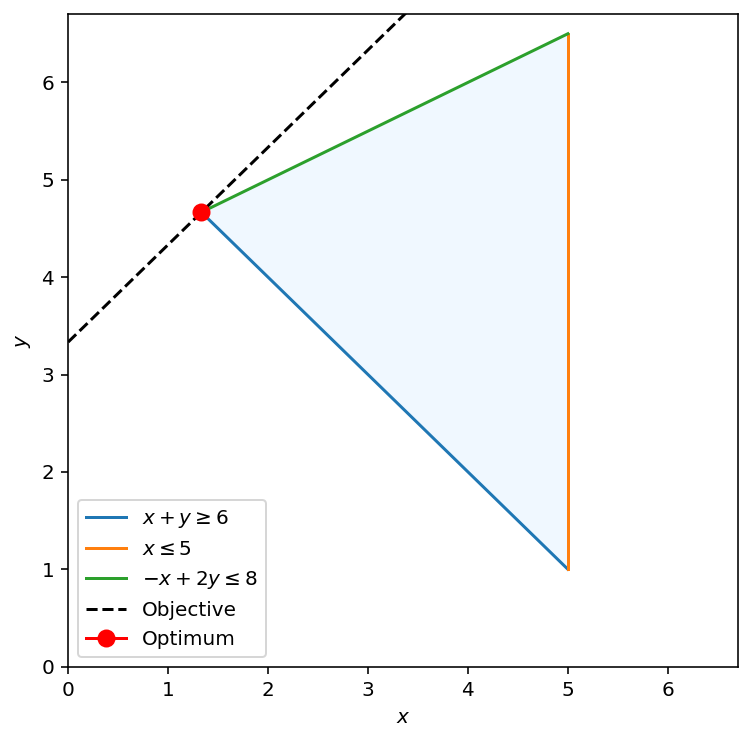

In [17]:
plt.figure(figsize=(6, 6))
plt.plot([5, 1.3333], [1, 4.6666], label='$x + y \geq 6$')
plt.plot([5, 5], [1, 6.5], label='$x \leq 5$')
plt.plot([1.3333, 5], [4.6666, 6.5], label='$-x+2y \leq 8$')
plt.plot([0, 3.6666], [3.3333, 7],
         label='Objective',
         linestyle='--',
         color='k')
plt.plot(1.3333, 4.6666, marker='o', markersize=8, label='Optimum', color='r')
plt.fill([5, 1.3333, 5, 5], [1, 4.6666, 6.5, 1], color='#f0f8ff')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.xlim(0, 6.7)
plt.ylim(0, 6.7)
plt.legend(loc=3)
plt.show()

Now, say, we were to introduce a new constraint: $2x + y \geq 9$

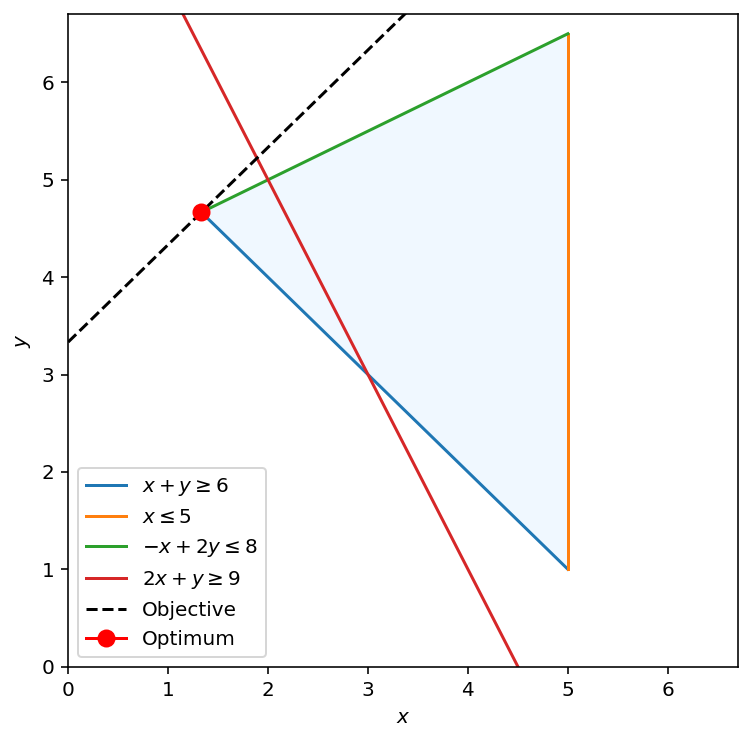

In [9]:
plt.figure(figsize=(6, 6))
plt.plot([5, 1.3333], [1, 4.666], label='$x + y \geq 6$')
plt.plot([5, 5], [1, 6.5], label='$x \leq 5$')
plt.plot([1.3333, 5], [4.6666, 6.5], label='$-x+2y \leq 8$')
plt.plot([4.5, 0], [0, 9], label='$2x+y \geq 9$')
plt.plot([0, 3.6666], [3.3333, 7], label='Objective', linestyle='--', color='k')
plt.plot(x.x, y.x, marker='o', markersize=8, label='Optimum', color='r')
plt.fill([5, 1.3333, 5, 5], [1, 4.6666, 6.5, 1], color='#f0f8ff')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.xlim(0, 6.7)
plt.ylim(0, 6.7)
plt.legend(loc=3)
plt.show()

Note that the new constraint cuts off the current optimum.<br/>
We will now add the constraint to our model.

In [10]:
m.addConstr(2 * x + y >= 9)

<gurobi.Constr *Awaiting Model Update*>

Do not forget to update the model before reoptimizing.

In [11]:
m.update()
m.optimize()

Gurobi Optimizer version 9.0.3 build v9.0.3rc0 (mac64)
Optimize a model with 3 rows, 2 columns and 6 nonzeros
Coefficient statistics:
  Matrix range     [1e+00, 2e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [5e+00, 5e+00]
  RHS range        [6e+00, 9e+00]
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    3.3333333e+00   8.333333e-01   0.000000e+00      0s
       1    3.0000000e+00   0.000000e+00   0.000000e+00      0s

Solved in 1 iterations and 0.01 seconds
Optimal objective  3.000000000e+00


The new optimal objective value and the values of the variables are displayed below.

In [12]:
print('The optimal objective value is', round(m.ObjVal, 2))
for v in m.getVars():
    print(f'The optimum value for {v.varName} is {round(v.x, 2)}')

The optimal objective value is 3.0
The optimum value for x is 2.0
The optimum value for y is 5.0


See the updated polyhedron below.

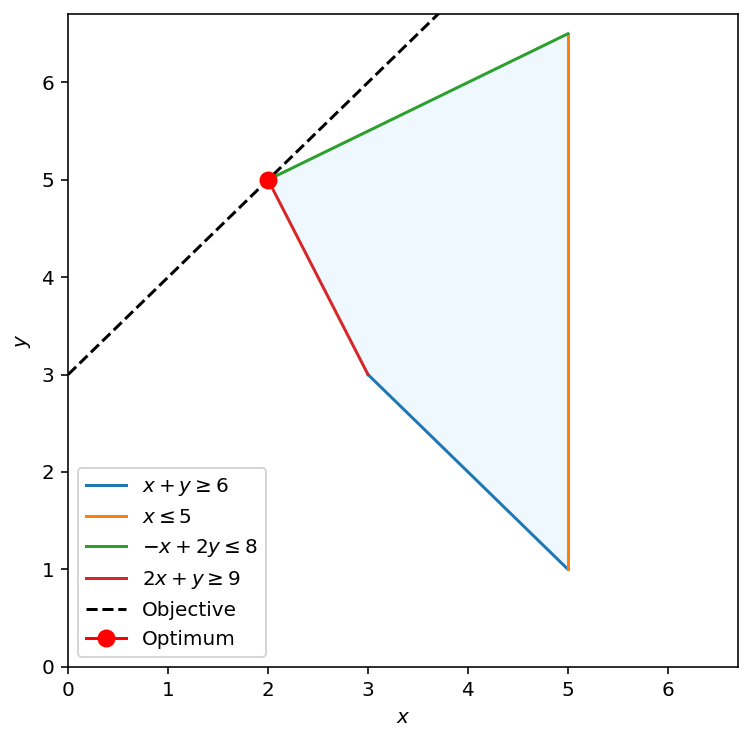

In [13]:
plt.figure(figsize=(6, 6))
plt.plot([5, 3], [1, 3], label='$x + y \geq 6$')
plt.plot([5, 5], [1, 6.5], label='$x \leq 5$')
plt.plot([2, 5], [5, 6.5], label='$-x+2y \leq 8$')
plt.plot([3, 2], [3, 5], label='$2x+y \geq 9$')
plt.plot([0, 4], [3, 7], label='Objective', linestyle='--', color='k')
plt.plot(x.x, y.x, marker='o', markersize=8, label='Optimum', color='r')
plt.fill([5, 3, 2, 5, 5], [1, 3, 5, 6.5, 1], color='#f0f8ff')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.xlim(0, 6.7)
plt.ylim(0, 6.7)
plt.legend(loc=3)
plt.show()

Congratulations! You have solved your first LP!

## Conclusion

In this notebook you have build a very basic model in Python using the Gurobi library and used it to solve the given LP.  
You have also seen how an added constraint changes the feasible region and influences the optimal solution (only if the new constraint cuts off the previous optimum, of course).  
In the next notebook we are going to walk you through the solution process of the _knapsack problem_, a classical optimization problem.

Thank you for your attention and see you there!